In [1]:
!git clone https://github.com/huggingface/diffusers
%pip install git+https://github.com/huggingface/diffusers
%pip install triton
%pip install accelerate transformers ftfy gradio natsort safetensors
%pip install bitsandbytes
%pip install -U peft

Cloning into 'diffusers'...
remote: Enumerating objects: 72468, done.
remote: Counting objects: 100% (1406/1406), done.
remote: Compressing objects: 100% (666/666), done.
remote: Total 72468 (delta 929), reused 966 (delta 639), pack-reused 71062 (from 1)
Receiving objects: 100% (72468/72468), 51.79 MiB | 11.16 MiB/s, done.
Resolving deltas: 100% (53525/53525), done.
  Cloning https://github.com/huggingface/diffusers to /tmp/pip-req-build-gira0x2a
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers /tmp/pip-req-build-gira0x2a
  Resolved https://github.com/huggingface/diffusers to commit 9366c8f84bfe47099ff047272661786ebb54721d
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.32.0.dev0-py3-none-any.whl size=2873581 sha256=8269c40c27543ff17dd090b020b816832a9e40244c0fab6b25b61f2bd47f34e2
  Stored in directory: 

In [5]:
import peft

In [3]:
!wget https://raw.githubusercontent.com/CompVis/stable-diffusion/main/configs/stable-diffusion/v1-inference.yaml

--2024-10-23 06:42:58--  https://raw.githubusercontent.com/CompVis/stable-diffusion/main/configs/stable-diffusion/v1-inference.yaml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1873 (1.8K) [text/plain]
Saving to: ‘v1-inference.yaml’

v1-inference.yaml   100%[===================>]   1.83K  --.-KB/s    in 0s      

2024-10-23 06:42:58 (31.8 MB/s) - ‘v1-inference.yaml’ saved [1873/1873]



In [6]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [7]:
import os
os.environ['INSTANCE_DIR'] = "/content/drive/MyDrive/buscemi"
os.environ['CLASS_DIR'] = "/content/drive/MyDrive/class_images"

os.environ['MODEL_NAME'] = "/content/cache_dir/models/model"
os.environ['OUTPUT_DIR'] = "/content/drive/MyDrive/shared/stable-diffusion-weights/dreambooth/hw"

In [9]:
!python diffusers/scripts/convert_original_stable_diffusion_to_diffusers.py \
      --checkpoint_path='/content/drive/MyDrive/picxReal_10.safetensors'\
      --original_config_file='/content/v1-inference.yaml'\
      --dump_path='/content/cache_dir/models/model'\
      --scheduler_type="ddim" --prediction_type='epsilon'\
      --from_safetensors

2024-10-23 07:04:38.017295: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-23 07:04:38.041227: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-23 07:04:38.048410: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-23 07:04:39.377002: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
config.json: 100% 4.52k/4.52k [00:00<00:00, 20.1MB/s]
tokenizer_config.json: 100% 905/905 [00:00<00:00, 6.01MB/s]
vocab.json: 100% 961k/961k [00:01<00:00, 593kB/s]
merges.txt: 100% 525k/525k [00:00<00:00, 46.5MB/s]
special_tokens_map.json: 1

In [1]:
print(1)

1


In [8]:
!python3 /content/diffusers/examples/dreambooth/train_dreambooth.py \
  --pretrained_model_name_or_path=$MODEL_NAME \
  --instance_data_dir=$INSTANCE_DIR \
  --class_data_dir=$CLASS_DIR \
  --output_dir=$OUTPUT_DIR \
  --instance_prompt="a photo of sks man face" \
  --class_prompt="a photo of man face" \
  --with_prior_preservation --prior_loss_weight=1.0 \
  --resolution=512 \
  --train_batch_size=1 \
  --learning_rate=3e-6 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=10 \
  --gradient_accumulation_steps=2 \
  --num_class_images=500 \
  --max_train_steps=400 \
  --checkpointing_steps=400 \
  --sample_batch_size=8 \
  --mixed_precision="fp16"\
  --use_8bit_adam \
  --train_text_encoder

2024-10-23 07:26:52.538803: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-23 07:26:52.562875: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-23 07:26:52.570203: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-23 07:26:52.587372: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-23 07:26:54.053443: W tensorflow/comp

In [9]:
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline, DDIMScheduler
from IPython.display import display
import os

model_path = os.environ['OUTPUT_DIR']

pipe = StableDiffusionPipeline.from_pretrained(model_path, safety_checker=None, torch_dtype=torch.float32).to("cuda")
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)
g_cuda = torch.Generator(device='cuda')
seed = 12345
g_cuda.manual_seed(seed)

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/50 [00:00<?, ?it/s]

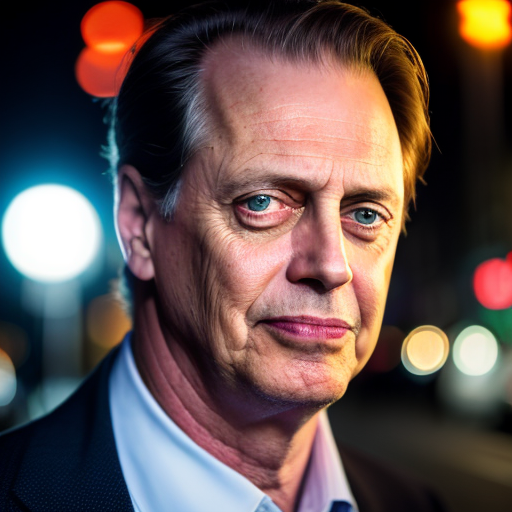

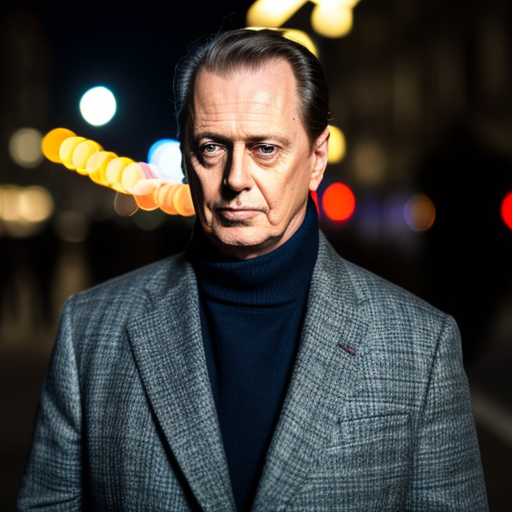

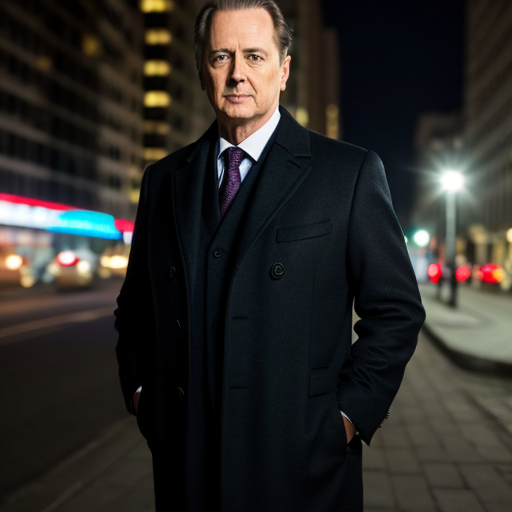

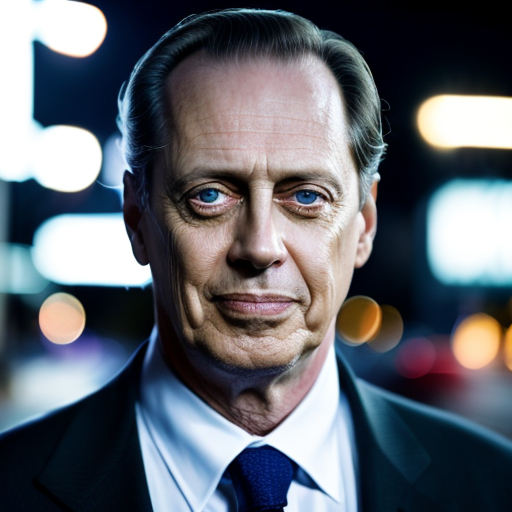

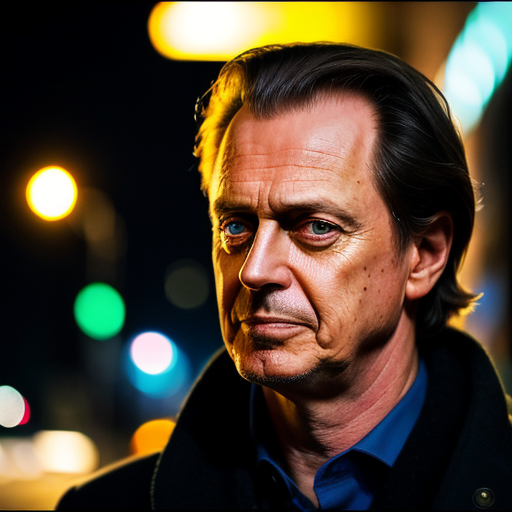

In [10]:
prompt = "portrait of sks man face, on the street, lights, midnight, standing, 4K, raw, hrd, hd, high quality, realism, sharp focus, detailed eyes, one person"
negative_prompt = "naked, nsfw, deformed, distorted, disfigured, poorly drawn, bad anatomy, extra limb, missing limb, floating limbs, mutated hands disconnected limbs, mutation, ugly, blurry, amputation, multiple persons"
guidance_scale = 7.5
num_inference_steps = 50
num_samples = 5
height = 512
width = 512

with autocast("cuda"), torch.inference_mode():
    images = pipe(
        prompt,
        height=height,
        width=width,
        negative_prompt=negative_prompt,
        num_images_per_prompt=num_samples,
        num_inference_steps=num_inference_steps,
        guidance_scale=guidance_scale,
        generator=g_cuda
    ).images

for img in images:
    display(img)

In [11]:
token = "sks"
promt_list = [
    {
     "name": "kitchen",
     "prompt":f"close up portrait of {token} man face, in the kitchen, standing, 4K, raw, hrd, hd, high quality, realism, sharp focus, one person",
     "n_prompt":"naked, nsfw, deformed, distorted, disfigured, poorly drawn, bad anatomy, extra limb, missing limb, floating limbs, mutated hands disconnected limbs, mutation, ugly, blurry, amputation, multiple_persons",
    },
    {
     "name": "forest",
     "prompt":f"portrait of {token} man face, in the forest, standing, 4K, raw, hrd, hd, high quality, realism, sharp focus, one person",
     "n_prompt":"naked, nsfw, deformed, distorted, disfigured, poorly drawn, bad anatomy, extra limb, missing limb, floating limbs, mutated hands disconnected limbs, mutation, ugly, blurry, amputation, multiple_persons",
    },
    {
     "name": "street",
     "prompt":f"portrait of {token} man face, on the street, lights, midnight, NY, standing, 4K, raw, hrd, hd, high quality, realism, sharp focus,  beautiful eyes, detailed eyes, one person",
     "n_prompt":"naked, nsfw, deformed, distorted, disfigured, poorly drawn, bad anatomy, extra limb, missing limb, floating limbs, mutated hands, mutation, ugly, blurry, multiple_persons",
    },
    {
     "name": "football",
     "prompt":f"portrait of {token} man face, playing football, night, football field, lights, standing, 4K, raw, hrd, hd, high quality, realism, sharp focus, one person",
     "n_prompt":"naked, nsfw, deformed, distorted, disfigured, poorly drawn, bad anatomy, extra limb, missing limb, floating limbs, mutated hands, mutation, ugly, blurry, multiple_persons",
    },
    {
     "name": "office",
     "prompt":f"portrait of {token} man face, in the office, sunset, coffee, sun, standing, 4K, raw, hrd, hd, high quality, realism, sharp focus, one person",
     "n_prompt":"naked, nsfw, deformed, distorted, disfigured, poorly drawn, bad anatomy, extra limb, missing limb, floating limbs, mutated hands, mutation, ugly, blurry, multiple_persons",
    },
]

from PIL import Image
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

In [13]:
seed = 123456
repeat = 2
num_samples = 2
guidance_scale = 7.5
num_inference_steps = 35
height = 512
width = 512

save_folder = "/content/drive/MyDrive/report_images"
save_mode = "base_model"

for idx, sample in enumerate(promt_list):
  prompt = sample.get("prompt")
  negative_prompt = sample.get("n_prompt")
  name = sample.get("name")
  image_list = []
  for _ in range(repeat):
    generator = torch.Generator("cuda").manual_seed(seed)
    with autocast("cuda"), torch.inference_mode():
        images = pipe(
            prompt,
            height=height,
            width=width,
            negative_prompt=negative_prompt,
            num_images_per_prompt=num_samples,
            num_inference_steps=num_inference_steps,
            guidance_scale=guidance_scale,
            generator=generator
        ).images
    image_list.extend(images)
    seed+=123

  img_grid = image_grid(image_list, num_samples, repeat)
  save_path = os.path.join(save_folder, save_mode, f"{height}x{width}")
  os.makedirs(save_path, exist_ok=True)
  img_grid.save(os.path.join(save_path, f"{name}.jpg"))

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

In [31]:
torch.cuda.empty_cache()

In [15]:
!python3 ./diffusers/examples/dreambooth/train_dreambooth_lora.py \
  --pretrained_model_name_or_path=$MODEL_NAME \
  --instance_data_dir=$INSTANCE_DIR \
  --class_data_dir=$CLASS_DIR \
  --output_dir='/content/drive/MyDrive/lora_outputs/r64' \
  --instance_prompt="a photo of sks man face" \
  --class_prompt="a photo of man face " \
  --with_prior_preservation --prior_loss_weight=1.0 \
  --resolution=512 \
  --train_batch_size=3 \
  --learning_rate=2e-4 \
  --lr_scheduler="cosine" \
  --lr_warmup_steps=20 \
  --gradient_accumulation_steps=1 \
  --num_class_images=500 \
  --sample_batch_size=16 \
  --max_train_steps=150 \
  --checkpointing_steps=150 \
  --mixed_precision="fp16"\
  --train_text_encoder \
  --rank=64

2024-10-23 08:00:16.450890: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-23 08:00:16.480998: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-23 08:00:16.490858: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-23 08:00:19.613421: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(*

In [ ]:
import peft

In [17]:
!ls /content/drive/MyDrive/lora_outputs/r64

checkpoint-150	logs  pytorch_lora_weights.safetensors


In [22]:
pipe.load_lora_weights("/content/drive/MyDrive/lora_outputs/r64/pytorch_lora_weights.safetensors")

seed = 123456
repeat = 2
num_samples = 2
guidance_scale = 7.5
num_inference_steps = 50
height = 512
width = 512

save_folder = "/content/drive/MyDrive/report_images/lora64/"
save_mode = "lora_r64"

for idx, sample in enumerate(promt_list):
  prompt = sample.get("prompt")
  negative_prompt = sample.get("n_prompt")
  name = sample.get("name")
  image_list = []
  for _ in range(repeat):
    generator = torch.Generator("cuda").manual_seed(seed)
    with autocast("cuda"), torch.inference_mode():
        images = pipe(
            prompt,
            height=height,
            width=width,
            negative_prompt=negative_prompt,
            num_images_per_prompt=num_samples,
            num_inference_steps=num_inference_steps,
            guidance_scale=guidance_scale,
            generator=generator
        ).images
    image_list.extend(images)
    seed+=123

  img_grid = image_grid(image_list, num_samples, repeat)
  save_path = os.path.join(save_folder, save_mode, f"{height}x{width}")
  os.makedirs(save_path, exist_ok=True)
  img_grid.save(os.path.join(save_path, f"{name}.jpg"))

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [26]:
!python3 ./diffusers/examples/dreambooth/train_dreambooth_lora.py \
  --pretrained_model_name_or_path=$MODEL_NAME \
  --instance_data_dir=$INSTANCE_DIR \
  --class_data_dir=$CLASS_DIR \
  --output_dir='/content/drive/MyDrive/lora_outputs/r128' \
  --instance_prompt="a photo of sks man face" \
  --class_prompt="a photo of man face " \
  --with_prior_preservation --prior_loss_weight=1.0 \
  --resolution=512 \
  --train_batch_size=3 \
  --learning_rate=2e-4 \
  --lr_scheduler="cosine" \
  --lr_warmup_steps=20 \
  --gradient_accumulation_steps=1 \
  --num_class_images=500 \
  --sample_batch_size=16 \
  --max_train_steps=150 \
  --checkpointing_steps=150 \
  --mixed_precision="fp16"\
  --train_text_encoder \
  --rank=128

2024-10-23 08:33:48.567403: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-23 08:33:48.601625: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-23 08:33:48.615503: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-23 08:33:50.978656: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(*

In [27]:
pipe.load_lora_weights("/content/drive/MyDrive/lora_outputs/r128/pytorch_lora_weights.safetensors")

seed = 123456
repeat = 2
num_samples = 2
guidance_scale = 7.5
num_inference_steps = 50
height = 512
width = 512

save_folder = "/content/drive/MyDrive/report_images/lora64/"
save_mode = "lora_r128"

for idx, sample in enumerate(promt_list):
  prompt = sample.get("prompt")
  negative_prompt = sample.get("n_prompt")
  name = sample.get("name")
  image_list = []
  for _ in range(repeat):
    generator = torch.Generator("cuda").manual_seed(seed)
    with autocast("cuda"), torch.inference_mode():
        images = pipe(
            prompt,
            height=height,
            width=width,
            negative_prompt=negative_prompt,
            num_images_per_prompt=num_samples,
            num_inference_steps=num_inference_steps,
            guidance_scale=guidance_scale,
            generator=generator
        ).images
    image_list.extend(images)
    seed+=123

  img_grid = image_grid(image_list, num_samples, repeat)
  save_path = os.path.join(save_folder, save_mode, f"{height}x{width}")
  os.makedirs(save_path, exist_ok=True)
  img_grid.save(os.path.join(save_path, f"{name}.jpg"))

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [33]:
!python3 ./diffusers/examples/dreambooth/train_dreambooth_lora.py \
  --pretrained_model_name_or_path=$MODEL_NAME \
  --instance_data_dir=$INSTANCE_DIR \
  --class_data_dir=$CLASS_DIR \
  --output_dir='/content/drive/MyDrive/lora_outputs/r32' \
  --instance_prompt="a photo of sks man face" \
  --class_prompt="a photo of man face " \
  --with_prior_preservation --prior_loss_weight=1.0 \
  --resolution=512 \
  --train_batch_size=3 \
  --learning_rate=2e-4 \
  --lr_scheduler="cosine" \
  --lr_warmup_steps=20 \
  --gradient_accumulation_steps=1 \
  --num_class_images=500 \
  --sample_batch_size=16 \
  --max_train_steps=150 \
  --checkpointing_steps=150 \
  --mixed_precision="fp16"\
  --train_text_encoder \
  --rank=32

2024-10-23 09:00:49.941962: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-23 09:00:49.982113: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-23 09:00:49.992271: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-23 09:00:52.238811: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(*

In [34]:
pipe.load_lora_weights("/content/drive/MyDrive/lora_outputs/r32/pytorch_lora_weights.safetensors")

seed = 123456
repeat = 2
num_samples = 2
guidance_scale = 7.5
num_inference_steps = 50
height = 512
width = 512

save_folder = "/content/drive/MyDrive/report_images/lora64/"
save_mode = "lora_r32"

for idx, sample in enumerate(promt_list):
  prompt = sample.get("prompt")
  negative_prompt = sample.get("n_prompt")
  name = sample.get("name")
  image_list = []
  for _ in range(repeat):
    generator = torch.Generator("cuda").manual_seed(seed)
    with autocast("cuda"), torch.inference_mode():
        images = pipe(
            prompt,
            height=height,
            width=width,
            negative_prompt=negative_prompt,
            num_images_per_prompt=num_samples,
            num_inference_steps=num_inference_steps,
            guidance_scale=guidance_scale,
            generator=generator
        ).images
    image_list.extend(images)
    seed+=123

  img_grid = image_grid(image_list, num_samples, repeat)
  save_path = os.path.join(save_folder, save_mode, f"{height}x{width}")
  os.makedirs(save_path, exist_ok=True)
  img_grid.save(os.path.join(save_path, f"{name}.jpg"))

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]